In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('../Downloads/voter_turnout_merged_all_states.csv')
df.head()

,Residence_Addresses_City,elec_date,elec_year,elec_type,total_voters_asian,total_voters_black,total_voters_hispanic,total_voters_others,total_voters_white,voted_voters_asian,...,total_voters_college,total_voters_no_college,voted_voters_college,voted_voters_no_college,perc_turnout_college,perc_turnout_no_college,mean_age,voter_population,voted_voters,state
0,Oakland,2020_11_03,2020,General,30600.0,61476.0,37174.0,8628.0,83122.0,23041.0,...,80668.0,27989.0,71356.0,22543.0,88.456389,80.542356,47.829424,331652.0,172221.0,CA
1,Oakland,2018_11_06,2018,General,30600.0,61476.0,37174.0,8628.0,83122.0,14972.0,...,80668.0,27989.0,59248.0,17372.0,73.446720,62.067241,48.224196,331652.0,130249.0,CA
2,Oakland,2016_11_08,2016,General,30600.0,61476.0,37174.0,8628.0,83122.0,16057.0,...,80668.0,27989.0,60766.0,18951.0,75.328507,67.708743,46.819512,331652.0,135633.0,CA
3,Oakland,2014_11_04,2014,General,30600.0,61476.0,37174.0,8628.0,83122.0,8145.0,...,80668.0,27989.0,38216.0,10811.0,47.374424,38.625889,51.034918,331652.0,75153.0,CA
4,San Leandro,2020_11_03,2020,General,12705.0,5596.0,16028.0,2429.0,17780.0,9229.0,...,19051.0,10653.0,16014.0,8674.0,84.058580,81.423073,49.752550,70359.0,41879.0,CA


### Plot turnout by election type

In [3]:
df['total_turnout'] = df['voted_voters'] / df['voter_population']
df.head()

,Residence_Addresses_City,elec_date,elec_year,elec_type,total_voters_asian,total_voters_black,total_voters_hispanic,total_voters_others,total_voters_white,voted_voters_asian,...,total_voters_no_college,voted_voters_college,voted_voters_no_college,perc_turnout_college,perc_turnout_no_college,mean_age,voter_population,voted_voters,state,total_turnout
0,Oakland,2020_11_03,2020,General,30600.0,61476.0,37174.0,8628.0,83122.0,23041.0,...,27989.0,71356.0,22543.0,88.456389,80.542356,47.829424,331652.0,172221.0,CA,0.519282
1,Oakland,2018_11_06,2018,General,30600.0,61476.0,37174.0,8628.0,83122.0,14972.0,...,27989.0,59248.0,17372.0,73.446720,62.067241,48.224196,331652.0,130249.0,CA,0.392728
2,Oakland,2016_11_08,2016,General,30600.0,61476.0,37174.0,8628.0,83122.0,16057.0,...,27989.0,60766.0,18951.0,75.328507,67.708743,46.819512,331652.0,135633.0,CA,0.408962
3,Oakland,2014_11_04,2014,General,30600.0,61476.0,37174.0,8628.0,83122.0,8145.0,...,27989.0,38216.0,10811.0,47.374424,38.625889,51.034918,331652.0,75153.0,CA,0.226602
4,San Leandro,2020_11_03,2020,General,12705.0,5596.0,16028.0,2429.0,17780.0,9229.0,...,10653.0,16014.0,8674.0,84.058580,81.423073,49.752550,70359.0,41879.0,CA,0.595219


In [10]:
def general_local_turnout_diff(state, df):
    state_df = df[df['state']==state]
    avg_turnout_by_elect_type = state_df.groupby(['elec_type']).mean()['total_turnout']
    #print(avg_turnout_by_elect_type)
    output = avg_turnout_by_elect_type['General'] - avg_turnout_by_elect_type['Local_or_Municipal']
    return output

In [11]:
states = list(df['state'].unique())
states_without_local = []

for state in states:
    state_df = df[df['state']==state]
    elect_types = state_df['elec_type'].unique()
    has_local = False
    for elect_type in elect_types:
        if elect_type == 'Local_or_Municipal':
            has_local = True
    if has_local == False:
        states_without_local.append(state)

print('States without local or municipal elections', states_without_local)

for state in states_without_local:
    states.remove(state)
#print(states)

general_local_turnout_diffs = []

for state in states:
    #print(state)
    #print(general_local_turnout_diff(state))
    general_local_turnout_diffs.append(general_local_turnout_diff(state, df))
    #print(general_local_turnout_diffs)
print(general_local_turnout_diffs)


States without local or municipal elections ['MD', 'ME', 'MN', 'UT']
[0.36241292372761663, 0.5125598394546556, nan, 0.2550255201142092]


Text(0, 0.5, 'Difference in turnout percentage')

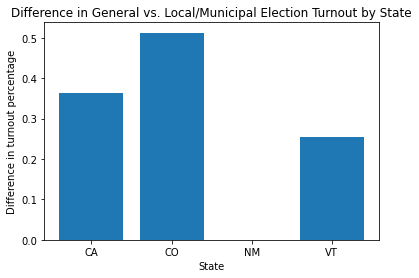

In [12]:
plt.bar(states, general_local_turnout_diffs)
plt.title('Difference in General vs. Local/Municipal Election Turnout by State')
plt.xlabel('State')
plt.ylabel('Difference in turnout percentage')

### Plot turnout by election type (RCV vs. Non-RCV)

In [13]:
rcv_cities = ['Albany', 'Berkeley', 'Eureka', 'Oakland', 'Palm Desert', 'San Francisco', 'San Leandro',
             'Las Cruces', 'Santa Fe', 'Boulder', 'Burlington', 'Portland', 'Takoma Park', 'Bluffdale',
             'Payson', 'Cottonwood Heights', 'Salt Lake City', 'Sandy', 'Midvale', 'Draper', 'Lehi',
             'Springville', 'South Salt Lake', 'Magna', 'Heber', 'Millcreek', 'Riverton', 'St. Louis Park',
             'Bloomington', 'Minneapolis', 'Minnetonka']
non_rcv_cities = list(set(df['Residence_Addresses_City']) - set(rcv_cities))

In [14]:
rcv_df = df[df['Residence_Addresses_City'].isin(rcv_cities)]
non_rcv_df = df[df['Residence_Addresses_City'].isin(non_rcv_cities)]

In [17]:
# Find tunout differences for RCV cities
states_rcv = list(rcv_df['state'].unique())
states_without_local_rcv = []

for state in states_rcv:
    state_df = rcv_df[rcv_df['state']==state]
    elect_types = state_df['elec_type'].unique()
    has_local = False
    for elect_type in elect_types:
        if elect_type == 'Local_or_Municipal':
            has_local = True
    if has_local == False:
        states_without_local_rcv.append(state)

#print('States without local or municipal elections', states_without_local_rcv)

for state in states_without_local_rcv:
    states_rcv.remove(state)
print(states_rcv)

general_local_turnout_diffs_rcv = []

for state in states_rcv:
    #print(state)
    #print(general_local_turnout_diff(state))
    general_local_turnout_diffs_rcv.append(general_local_turnout_diff(state, rcv_df))
    #print(general_local_turnout_diffs)
print(general_local_turnout_diffs_rcv)

['NM', 'VT']
[nan, 0.13255934438583272]


Text(0, 0.5, 'Difference in turnout percentage')

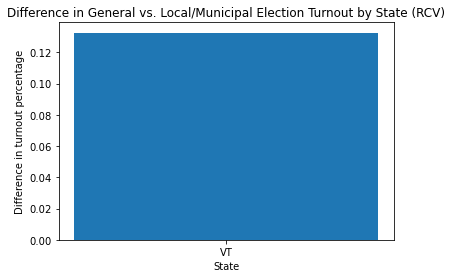

In [19]:
plt.bar(states_rcv, general_local_turnout_diffs_rcv)
plt.title('Difference in General vs. Local/Municipal Election Turnout by State (RCV)')
plt.xlabel('State')
plt.ylabel('Difference in turnout percentage')

In [18]:
# Find tunout differences for non-RCV cities
states_non_rcv = list(non_rcv_df['state'].unique())
states_without_local_non_rcv = []

for state in states_non_rcv:
    state_df = non_rcv_df[non_rcv_df['state']==state]
    elect_types = state_df['elec_type'].unique()
    has_local = False
    for elect_type in elect_types:
        if elect_type == 'Local_or_Municipal':
            has_local = True
    if has_local == False:
        states_without_local_non_rcv.append(state)

#print('States without local or municipal elections', states_without_local_rcv)

for state in states_without_local_non_rcv:
    states_non_rcv.remove(state)
print(states_non_rcv)

general_local_turnout_diffs_non_rcv = []

for state in states_non_rcv:
    #print(state)
    #print(general_local_turnout_diff(state))
    general_local_turnout_diffs_non_rcv.append(general_local_turnout_diff(state, non_rcv_df))
    #print(general_local_turnout_diffs)
print(general_local_turnout_diffs_non_rcv)

['CA', 'CO', 'NM', 'VT']
[0.35489051147650086, 0.5211867209648677, nan, 0.2672721376870469]


Text(0, 0.5, 'Difference in turnout percentage')

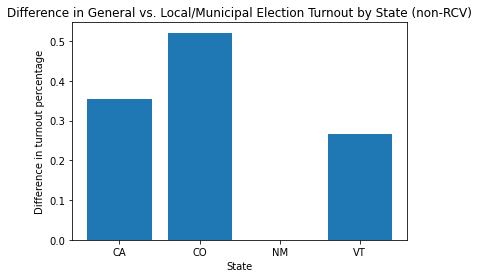

In [20]:
plt.bar(states_non_rcv, general_local_turnout_diffs_non_rcv)
plt.title('Difference in General vs. Local/Municipal Election Turnout by State (non-RCV)')
plt.xlabel('State')
plt.ylabel('Difference in turnout percentage')

### Income by election type

In [21]:
consolidated_general_df = df[df['elec_type']=='Consolidated_General']
general_df = df[df['elec_type']=='General']
local_municipal_df = df[df['elec_type']=='Local_or_Municipal']

In [22]:
income_cols = ['voted_voters_$1000-14999',
               'voted_voters_$100000-124999', 'voted_voters_$125000-149999',
               'voted_voters_$15000-24999', 'voted_voters_$150000-174999',
               'voted_voters_$175000-199999', 'voted_voters_$200000-249999',
               'voted_voters_$25000-34999', 'voted_voters_$250000+',
               'voted_voters_$35000-49999', 'voted_voters_$50000-74999',
               'voted_voters_$75000-99999']

ordered_income_cols = ['voted_voters_$1000-14999',
                      'voted_voters_$15000-24999',
                      'voted_voters_$25000-34999',
                      'voted_voters_$35000-49999',
                      'voted_voters_$50000-74999',
                      'voted_voters_$75000-99999',
                      'voted_voters_$100000-124999',
                      'voted_voters_$125000-149999',
                      'voted_voters_$150000-174999',
                      'voted_voters_$175000-199999',
                      'voted_voters_$200000-249999',
                      'voted_voters_$250000+']

consolidated_general_income = consolidated_general_df[income_cols].drop_duplicates().sum(axis=0)
general_income = general_df[income_cols].drop_duplicates().sum(axis=0)
local_municipal_income = local_municipal_df[income_cols].drop_duplicates().sum(axis=0)

consolidated_general_income = consolidated_general_income.reindex(ordered_income_cols)
general_income = general_income.reindex(ordered_income_cols)
local_municipal_income = local_municipal_income.reindex(ordered_income_cols)


In [23]:
#get percentage breakdown of voter income by election type

total_consolidated_general_voters = sum(consolidated_general_income)
consolidated_general_income = consolidated_general_income.div(total_consolidated_general_voters)

total_general_voters = sum(general_income)
general_income = general_income.div(total_general_voters)

total_local_municipal_voters = sum(local_municipal_income)
local_municipal_income = local_municipal_income.div(total_local_municipal_voters)

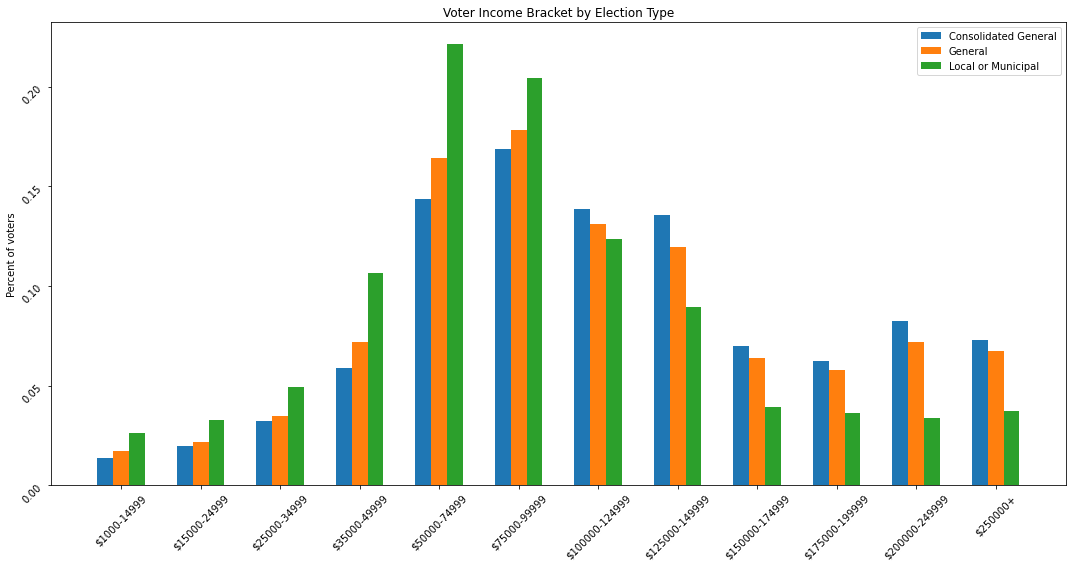

In [24]:
x_labels = ['$1000-14999',
          '$15000-24999',
          '$25000-34999',
          '$35000-49999',
          '$50000-74999',
          '$75000-99999',
          '$100000-124999',
          '$125000-149999',
          '$150000-174999',
          '$175000-199999',
          '$200000-249999',
          '$250000+']
x = np.arange(len(x_labels))
width = 0.2

fig, ax = plt.subplots(figsize=(15, 8))
rects1 = ax.bar(x - width, consolidated_general_income, width, label='Consolidated General')
rects2 = ax.bar(x, general_income, width, label='General')
rects3 = ax.bar(x + width, local_municipal_income, width, label='Local or Municipal')

ax.set_ylabel('Percent of voters')
ax.set_title('Voter Income Bracket by Election Type')
ax.set_xticks(x)
ax.set_xticklabels(x_labels)

ax.tick_params(labelrotation=45)
ax.legend()

fig.tight_layout()
plt.show()

### Income by election type (RCV)

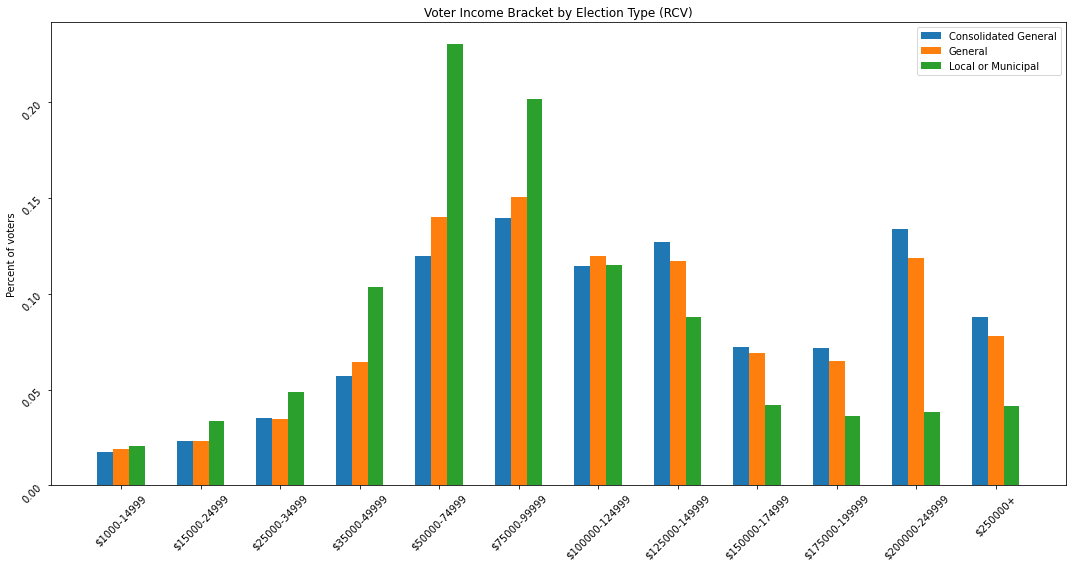

In [25]:
consolidated_general_df_rcv = rcv_df[rcv_df['elec_type']=='Consolidated_General']
general_df_rcv = rcv_df[rcv_df['elec_type']=='General']
local_municipal_df_rcv = rcv_df[rcv_df['elec_type']=='Local_or_Municipal']

consolidated_general_income_rcv = consolidated_general_df_rcv[income_cols].drop_duplicates().sum(axis=0)
general_income_rcv = general_df_rcv[income_cols].drop_duplicates().sum(axis=0)
local_municipal_income_rcv = local_municipal_df_rcv[income_cols].drop_duplicates().sum(axis=0)

consolidated_general_income_rcv = consolidated_general_income_rcv.reindex(ordered_income_cols)
general_income_rcv = general_income_rcv.reindex(ordered_income_cols)
local_municipal_income_rcv = local_municipal_income_rcv.reindex(ordered_income_cols)

#get percentage breakdown of voter income by election type

total_consolidated_general_voters_rcv = sum(consolidated_general_income_rcv)
consolidated_general_income_rcv = consolidated_general_income_rcv.div(total_consolidated_general_voters_rcv)

total_general_voters_rcv = sum(general_income_rcv)
general_income_rcv = general_income_rcv.div(total_general_voters_rcv)

total_local_municipal_voters_rcv = sum(local_municipal_income_rcv)
local_municipal_income_rcv = local_municipal_income_rcv.div(total_local_municipal_voters_rcv)


fig, ax = plt.subplots(figsize=(15, 8))
rects1 = ax.bar(x - width, consolidated_general_income_rcv, width, label='Consolidated General')
rects2 = ax.bar(x, general_income_rcv, width, label='General')
rects3 = ax.bar(x + width, local_municipal_income_rcv, width, label='Local or Municipal')

ax.set_ylabel('Percent of voters')
ax.set_title('Voter Income Bracket by Election Type (RCV)')
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.tick_params(labelrotation=45)
ax.legend()

fig.tight_layout()
plt.show()

### Income by election type (non-RCV)

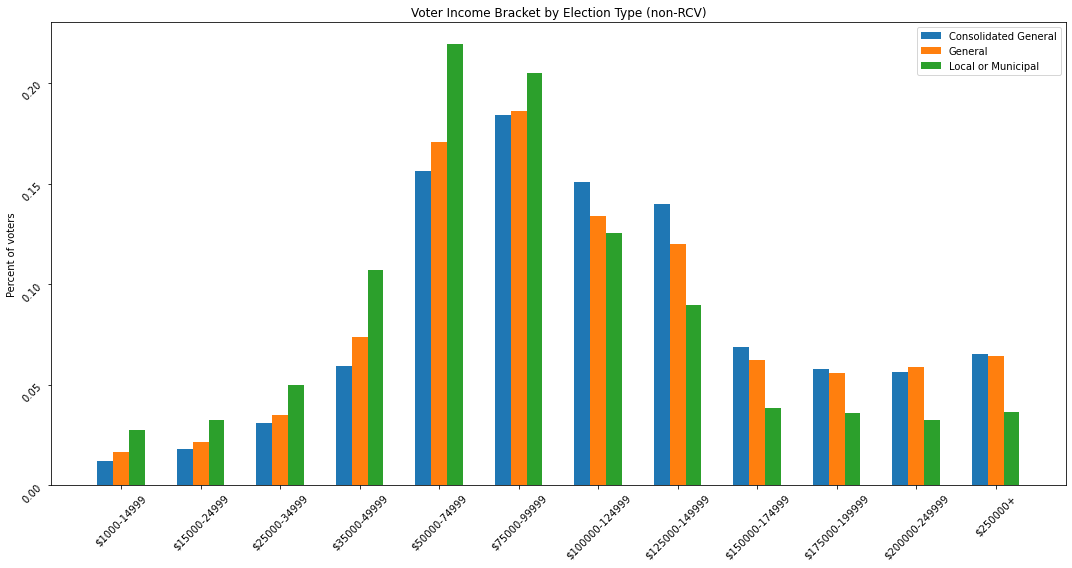

In [26]:
consolidated_general_df_non_rcv = non_rcv_df[non_rcv_df['elec_type']=='Consolidated_General']
general_df_non_rcv = non_rcv_df[non_rcv_df['elec_type']=='General']
local_municipal_df_non_rcv = non_rcv_df[non_rcv_df['elec_type']=='Local_or_Municipal']

consolidated_general_income_non_rcv = consolidated_general_df_non_rcv[income_cols].drop_duplicates().sum(axis=0)
general_income_non_rcv = general_df_non_rcv[income_cols].drop_duplicates().sum(axis=0)
local_municipal_income_non_rcv = local_municipal_df_non_rcv[income_cols].drop_duplicates().sum(axis=0)

consolidated_general_income_non_rcv = consolidated_general_income_non_rcv.reindex(ordered_income_cols)
general_income_non_rcv = general_income_non_rcv.reindex(ordered_income_cols)
local_municipal_income_non_rcv = local_municipal_income_non_rcv.reindex(ordered_income_cols)


#get percentage breakdown of voter income by election type

total_consolidated_general_voters_non_rcv = sum(consolidated_general_income_non_rcv)
consolidated_general_income_non_rcv = consolidated_general_income_non_rcv.div(total_consolidated_general_voters_non_rcv)

total_general_voters_non_rcv = sum(general_income_non_rcv)
general_income_non_rcv = general_income_non_rcv.div(total_general_voters_non_rcv)

total_local_municipal_voters_non_rcv = sum(local_municipal_income_non_rcv)
local_municipal_income_non_rcv = local_municipal_income_non_rcv.div(total_local_municipal_voters_non_rcv)


fig, ax = plt.subplots(figsize=(15, 8))
rects1 = ax.bar(x - width, consolidated_general_income_non_rcv, width, label='Consolidated General')
rects2 = ax.bar(x, general_income_non_rcv, width, label='General')
rects3 = ax.bar(x + width, local_municipal_income_non_rcv, width, label='Local or Municipal')

ax.set_ylabel('Percent of voters')
ax.set_title('Voter Income Bracket by Election Type (non-RCV)')
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.tick_params(labelrotation=45)
ax.legend()

fig.tight_layout()
plt.show()